<a href="https://colab.research.google.com/github/ingridmidory/Programa-Pr-cticas-Escolares/blob/main/Heart_Disease_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #manipulación y el análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales, es como el Excel de Python.
import pylab as pl
import numpy as np #soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel
import scipy.optimize as opt # para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs, etc
import statsmodels.api as sm #biblioteca de análisis y modelado de datos estadísticos
from sklearn import preprocessing #Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt #es una biblioteca para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas o arrays
import matplotlib.mlab as mlab
import seaborn as sns # biblioteca para crear gráficos estadísticos

# Cargar los datos a nuestro notebook.

El conjunto de datos proviene de un estudio cardiovascular en curso sobre residentes de la ciudad de Framingham, Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene riesgo a 10 años de sufrir enfermedad coronaria (CHD) en el futuro. El conjunto de datos proporciona la información de los pacientes. Incluye más de 4.000 registros y 15 atributos.

In [ ]:
disease_df = pd.read_csv("/content/framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)
disease_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


Remover los vacios

In [ ]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

Hasta aquí, podemos explorar los datos e investigar cuales son los atributos que se presentan, por ejemplo edad, si fuma y cuántos cigarrillos fua al día, etc.


# ML Tools

Dividir el conjunto de datos en conjuntos de prueba y entrenamiento

In [ ]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


# Análisis de datos exploratorios del conjunto de datos de enfermedades cardíacas

Registro de enfermedad coronaria de diez años de todos los pacientes disponibles en el conjunto de datos:


<ipython-input-7-bc59419c8daf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


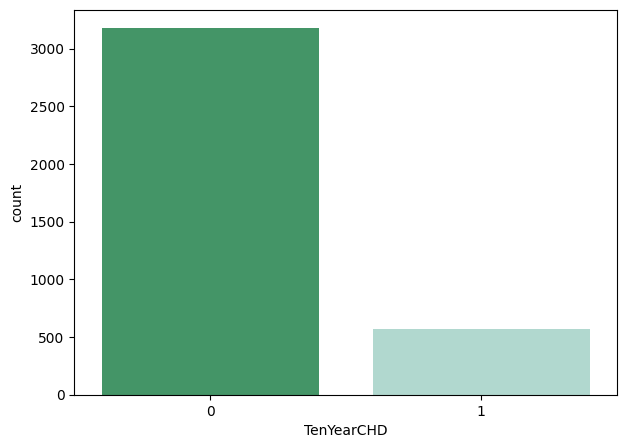

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

# This code is modified by Susobhan Akhuli
